# **1. 리뷰 가져오기**

### 라이브러리

In [ ]:
pip install --upgrade app-store-scraper

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install google-play-scraper

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 분산된 어플 리뷰 통합

In [ ]:
import pandas as pd
from google_play_scraper import reviews, Sort

# 앱 이름과 패키지명을 딕셔너리로 저장
apps = {
    'bubble for JYPnation': 'com.dearu.bubble.jyp',
    'bubble with STARS': 'com.dearu.bubble.stars',
    'bubble for ACTORS': 'com.dearu.bubble.actors',
    'bubble for STARSHIP': 'com.dearu.bubble.starship',
    'bubble for BPM': 'com.dearu.bubble.bpm',
    'bubble for BHEnt.': 'com.dearu.bubble.bh',
    'bubble for CUBE': 'com.dearu.bubble.cube',
    'bubble for BLISSOO': 'com.dearu.bubble.blissoo',
    'bubble for GOLDMEDALIST': 'com.dearu.bubble.goldmedalist',
    'bubble for SOOSOO': 'com.dearu.bubble.soosoo',
    'bubble for IST': 'com.dearu.bubble.playm',
    'bubble for INB100': 'com.dearu.bubble.inb100',
    'bubble for TOP': 'com.dearu.bubble.top',
    'bubble for LLOUD': 'com.dearu.bubble.lloud',
    'bubble for SPORTS': 'com.dearu.bubble.sports'
}

total_reviews = []
count_per_request = 100  # 한 번에 가져올 리뷰 수
target_count = 20000     # 앱당 최대 수집 리뷰 수

# 앱별로 리뷰 수집
for app_name, package in apps.items():
    print(f"수집 시작: {app_name} ({package})")
    app_reviews = []  # 개별 앱 리뷰 저장용 리스트

    result, continuation_token = reviews(
        package,  # 앱 패키지명
        lang='ko',  # 한국어
        country='kr',  # 한국
        sort=Sort.NEWEST,  # 최신순 정렬
        count=count_per_request,
    )

    app_reviews.extend(result)

    while len(app_reviews) < target_count and continuation_token:
        prev_count = len(app_reviews)  # 현재까지 수집된 리뷰 개수 저장
        result, continuation_token = reviews(
            package,
            lang='ko',
            country='kr',
            sort=Sort.NEWEST,
            count=count_per_request,
            continuation_token=continuation_token
        )

        if not result:  # 새로 가져온 리뷰가 없으면 중지
            print(f"{app_name} - 더 이상 가져올 리뷰가 없습니다. 종료합니다.")
            break

        app_reviews.extend(result)

        # 새로운 리뷰가 추가되지 않은 경우 종료
        if len(app_reviews) == prev_count:
            print(f"{app_name} - 새로운 리뷰가 추가되지 않아 종료합니다.")
            break

    # 수집된 리뷰에 앱 이름과 패키지명 추가
    for review in app_reviews:
        review['app_name'] = app_name

    total_reviews.extend(app_reviews)
    print(f"{app_name} - 리뷰 수집 완료: {len(app_reviews)}개\n")

# 데이터프레임으로 변환
playstore_reviews = pd.DataFrame(total_reviews)

# 결과 확인
# print(f"총 수집된 리뷰 수: {len(playstore_reviews)}개")
# print(playstore_reviews[['app_name', 'package_name', 'content']].head())

# CSV로 저장
playstore_reviews.to_csv('저장 경로', index=False, encoding='utf-8-sig')
# print("리뷰 데이터가 bubble_playstore_reviews.csv 파일로 저장되었습니다.")


수집 시작: bubble for JYPnation (com.dearu.bubble.jyp)
bubble for JYPnation - 더 이상 가져올 리뷰가 없습니다. 종료합니다.
bubble for JYPnation - 리뷰 수집 완료: 580개

수집 시작: bubble with STARS (com.dearu.bubble.stars)
bubble with STARS - 더 이상 가져올 리뷰가 없습니다. 종료합니다.
bubble with STARS - 리뷰 수집 완료: 621개

수집 시작: bubble for ACTORS (com.dearu.bubble.actors)
bubble for ACTORS - 더 이상 가져올 리뷰가 없습니다. 종료합니다.
bubble for ACTORS - 리뷰 수집 완료: 53개

수집 시작: bubble for STARSHIP (com.dearu.bubble.starship)
bubble for STARSHIP - 더 이상 가져올 리뷰가 없습니다. 종료합니다.
bubble for STARSHIP - 리뷰 수집 완료: 122개

수집 시작: bubble for BPM (com.dearu.bubble.bpm)
bubble for BPM - 더 이상 가져올 리뷰가 없습니다. 종료합니다.
bubble for BPM - 리뷰 수집 완료: 24개

수집 시작: bubble for BHEnt. (com.dearu.bubble.bh)
bubble for BHEnt. - 더 이상 가져올 리뷰가 없습니다. 종료합니다.
bubble for BHEnt. - 리뷰 수집 완료: 2개

수집 시작: bubble for CUBE (com.dearu.bubble.cube)
bubble for CUBE - 더 이상 가져올 리뷰가 없습니다. 종료합니다.
bubble for CUBE - 리뷰 수집 완료: 32개

수집 시작: bubble for BLISSOO (com.dearu.bubble.blissoo)
bubble for BLISSOO - 더 이상 가져올 리뷰

In [ ]:
import pandas as pd
from app_store_scraper import AppStore

# 앱 이름과 앱 ID 딕셔너리
apps = {
    # 'bubble-for-jypnation': 1538372244,
    # 'bubble-with-stars': 1556582179,
    # 'bubble-for-actors': 1630269885,
    # 'bubble-for-starship': 1667760766,
    # 'bubble-for-bpm': 6446391980,
    # 'bubble-for-bhent': 6535674658,
    # 'bubble-for-cube': 6446391870,
    # 'bubble-for-goldmedalist': 6480480028,
    # 'bubble-for-soosoo': 6476524956,
    # 'bubble-for-ist': 1562604323,
    # 'bubble-for-inb100': 6476524964,
    # 'bubble-for-top': 1562604620,
    # 'bubble-for-blissoo': 6476525014,
    # 'bubble-for-lloud': 6593666954,
    # 'bubble-for-sports': 1604296677
    'bubble for JYPnation': 1538372244,
    'bubble with STARS': 1556582179,
    'bubble for ACTORS': 1630269885,
    'bubble for STARSHIP': 1667760766,
    'bubble for BPM': 6446391980,
    'bubble for BHEnt.': 6535674658,
    'bubble for CUBE': 6446391870,
    'bubble for GOLDMEDALIST': 6480480028,
    'bubble for SOOSOO': 6476524956,
    'bubble for IST': 1562604323,
    'bubble for INB100': 6476524964,
    'bubble for TOP': 1562604620,
    'bubble for BLISSOO': 6476525014,
    'bubble for LLOUD': 6593666954,
    'bubble for SPORTS': 1604296677
}

total_reviews = []

# 앱별 리뷰 수집
for app_name, app_id in apps.items():
    print(f"리뷰 수집 시작: {app_name} (ID: {app_id})")
    appstore = AppStore(country="kr", app_name=app_name, app_id=app_id)
    appstore.review(how_many=100000)  # 최대 100,000개의 리뷰 수집

    # 리뷰가 없는 경우 건너뛰기
    if not appstore.reviews:
        print(f"{app_name} - 리뷰 없음. 건너뜁니다.")
        continue

    # 수집한 리뷰에 앱 이름과 앱 ID 추가
    for review in appstore.reviews:
        review['app_name'] = app_name
        # review['app_id'] = app_id

    total_reviews.extend(appstore.reviews)
    print(f"{app_name} - 리뷰 수집 완료: {len(appstore.reviews)}개\n")

# 데이터프레임으로 변환
appstore_reviews_df = pd.DataFrame(total_reviews)

# 날짜 컬럼을 datetime으로 변환 후 최신순으로 정렬
appstore_reviews_df['date'] = pd.to_datetime(appstore_reviews_df['date'])
appstore_reviews_df = appstore_reviews_df.sort_values(by='date', ascending=False).reset_index(drop=True)

# CSV로 저장
appstore_reviews_df.to_csv('저장 경로', index=False, encoding='utf-8-sig')
# print("리뷰 데이터가 bubble_appstore_reviews.csv 파일로 저장되었습니다.")


리뷰 수집 시작: bubble for JYPnation (ID: 1538372244)


2025-02-25 17:37:20,730 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-jypnation', 1538372244)
2025-02-25 17:37:20,731 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-jypnation/id1538372244
2025-02-25 17:37:25,967 [INFO] Base - [id:1538372244] Fetched 380 reviews (380 fetched in total)
2025-02-25 17:37:27,572 [INFO] Base - [id:1538372244] Fetched 489 reviews (489 fetched in total)


bubble for JYPnation - 리뷰 수집 완료: 489개

리뷰 수집 시작: bubble with STARS (ID: 1556582179)


2025-02-25 17:37:28,392 [INFO] Base - Initialised: AppStore('kr', 'bubble-with-stars', 1556582179)
2025-02-25 17:37:28,393 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-with-stars/id1556582179
2025-02-25 17:37:33,593 [INFO] Base - [id:1556582179] Fetched 380 reviews (380 fetched in total)
2025-02-25 17:37:33,867 [INFO] Base - [id:1556582179] Fetched 399 reviews (399 fetched in total)


bubble with STARS - 리뷰 수집 완료: 399개

리뷰 수집 시작: bubble for ACTORS (ID: 1630269885)


2025-02-25 17:37:34,750 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-actors', 1630269885)
2025-02-25 17:37:34,751 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-actors/id1630269885
2025-02-25 17:37:35,560 [INFO] Base - [id:1630269885] Fetched 44 reviews (44 fetched in total)


bubble for ACTORS - 리뷰 수집 완료: 44개

리뷰 수집 시작: bubble for STARSHIP (ID: 1667760766)


2025-02-25 17:37:36,373 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-starship', 1667760766)
2025-02-25 17:37:36,374 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-starship/id1667760766
2025-02-25 17:37:37,689 [INFO] Base - [id:1667760766] Fetched 98 reviews (98 fetched in total)


bubble for STARSHIP - 리뷰 수집 완료: 98개

리뷰 수집 시작: bubble for BPM (ID: 6446391980)


2025-02-25 17:37:38,346 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-bpm', 6446391980)
2025-02-25 17:37:38,347 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-bpm/id6446391980
2025-02-25 17:37:38,612 [INFO] Base - [id:6446391980] Fetched 9 reviews (9 fetched in total)


bubble for BPM - 리뷰 수집 완료: 9개

리뷰 수집 시작: bubble for BHEnt. (ID: 6535674658)


2025-02-25 17:37:39,781 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-bhent-', 6535674658)
2025-02-25 17:37:39,782 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-bhent-/id6535674658
2025-02-25 17:37:58,483 [ERROR] Base - Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/kr/apps/6535674658/reviews?l=en-GB&offset=0&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 404 error responses'))
2025-02-25 17:37:58,487 [INFO] Base - [id:6535674658] Fetched 0 reviews (0 fetched in total)


bubble for BHEnt. - 리뷰 없음. 건너뜁니다.
리뷰 수집 시작: bubble for CUBE (ID: 6446391870)


2025-02-25 17:37:59,426 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-cube', 6446391870)
2025-02-25 17:37:59,427 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-cube/id6446391870
2025-02-25 17:37:59,702 [INFO] Base - [id:6446391870] Fetched 17 reviews (17 fetched in total)


bubble for CUBE - 리뷰 수집 완료: 17개

리뷰 수집 시작: bubble for GOLDMEDALIST (ID: 6480480028)


2025-02-25 17:38:00,572 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-goldmedalist', 6480480028)
2025-02-25 17:38:00,573 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-goldmedalist/id6480480028
2025-02-25 17:38:00,825 [INFO] Base - [id:6480480028] Fetched 13 reviews (13 fetched in total)


bubble for GOLDMEDALIST - 리뷰 수집 완료: 13개

리뷰 수집 시작: bubble for SOOSOO (ID: 6476524956)


2025-02-25 17:38:01,765 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-soosoo', 6476524956)
2025-02-25 17:38:01,767 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-soosoo/id6476524956
2025-02-25 17:38:02,020 [INFO] Base - [id:6476524956] Fetched 9 reviews (9 fetched in total)


bubble for SOOSOO - 리뷰 수집 완료: 9개

리뷰 수집 시작: bubble for IST (ID: 1562604323)


2025-02-25 17:38:02,825 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-ist', 1562604323)
2025-02-25 17:38:02,825 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-ist/id1562604323
2025-02-25 17:38:04,472 [INFO] Base - [id:1562604323] Fetched 107 reviews (107 fetched in total)


bubble for IST - 리뷰 수집 완료: 107개

리뷰 수집 시작: bubble for INB100 (ID: 6476524964)


2025-02-25 17:38:05,330 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-inb100', 6476524964)
2025-02-25 17:38:05,330 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-inb100/id6476524964
2025-02-25 17:38:05,844 [INFO] Base - [id:6476524964] Fetched 26 reviews (26 fetched in total)


bubble for INB100 - 리뷰 수집 완료: 26개

리뷰 수집 시작: bubble for TOP (ID: 1562604620)


2025-02-25 17:38:06,800 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-top', 1562604620)
2025-02-25 17:38:06,801 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-top/id1562604620
2025-02-25 17:38:07,057 [INFO] Base - [id:1562604620] Fetched 3 reviews (3 fetched in total)


bubble for TOP - 리뷰 수집 완료: 3개

리뷰 수집 시작: bubble for BLISSOO (ID: 6476525014)


2025-02-25 17:38:07,953 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-blissoo', 6476525014)
2025-02-25 17:38:07,954 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-blissoo/id6476525014
2025-02-25 17:38:08,216 [INFO] Base - [id:6476525014] Fetched 6 reviews (6 fetched in total)


bubble for BLISSOO - 리뷰 수집 완료: 6개

리뷰 수집 시작: bubble for LLOUD (ID: 6593666954)


2025-02-25 17:38:09,134 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-lloud', 6593666954)
2025-02-25 17:38:09,134 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-lloud/id6593666954
2025-02-25 17:38:09,389 [INFO] Base - [id:6593666954] Fetched 1 reviews (1 fetched in total)


bubble for LLOUD - 리뷰 수집 완료: 1개

리뷰 수집 시작: bubble for SPORTS (ID: 1604296677)


2025-02-25 17:38:10,223 [INFO] Base - Initialised: AppStore('kr', 'bubble-for-sports', 1604296677)
2025-02-25 17:38:10,223 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/kr/app/bubble-for-sports/id1604296677
2025-02-25 17:38:10,771 [INFO] Base - [id:1604296677] Fetched 38 reviews (38 fetched in total)


bubble for SPORTS - 리뷰 수집 완료: 38개



In [ ]:
import pandas as pd

apple = pd.read_csv('저장 경로', index_col=False)
google = pd.read_csv('저장 경로', index_col=False)

# 스토어 라벨 부여
apple['from'] = 'appstore'
google['from'] = 'playstore'


# 사용할 열 선택
apple = apple[['date', 'rating', 'review', 'app_name', 'from']]
google = google[['at', 'score', 'content', 'app_name', 'from']]

# 열 이름 변경하기
google = google.rename(columns={'at':'date',
                                'score':'rating',
                                'content':'review'})

# 앱스토어, 구글플레이스토어 리뷰 통합
total = pd.concat([apple, google])

# date 열 형식 변경 (연월일만 유지)
total['date'] = pd.to_datetime(total['date']).dt.date

total['date'] = pd.to_datetime(total['date'])  # 날짜 변환
total = total[total['date'] >= '2020-01-01'].sort_values(by='date', ascending=False)

total = total.reset_index(drop=True)

total

,date,rating,review,app_name,from
0,2025-02-23,5,버블 다 좋은데 제발 글자수 좀 늘리세요 옆집은 편지도 써주고 하고싶은 말 다 하는...,bubble for STARSHIP,appstore
1,2025-02-23,5,bubble 앱 깔고 결재단계에서 UAH 199.99로 나오네요 변경이 안되나요 빨...,bubble with STARS,playstore
2,2025-02-23,3,근데ㅠ 답장 왜 자꾸 종이비행기 표시 나죠 못 보낸 게 한둘이아닌데,bubble for BPM,playstore
3,2025-02-23,1,유료어플 주제에 오류 너무 심함 내 가수 버블 와서 알림 통해 들어가서 보면 자꾸 ...,bubble with STARS,playstore
4,2025-02-20,4,스타 추가된다고 팝업 뜨는거 다시 안보기 체크 하고 닫는데 하루 걸러 하루 뜨는건 ...,bubble with STARS,appstore
...,...,...,...,...,...
2845,2020-11-25,5,제왚 충성충성 (^-^)ㄱ 슼둥이들 이랑 버블이라니 이게 나라다...,bubble for JYPnation,playstore
2846,2020-11-25,5,"투피엠때매 이런것도 다해보고,,, 아무튼 소통의 창구 감자합니다 홍홍",bubble for JYPnation,playstore
2847,2020-11-25,5,투피엠 화이팅 🥰🥰,bubble for JYPnation,playstore
2848,2020-11-25,2,이메일로 인증번호 보냈다고 하는데 왜 안오니요,bubble for JYPnation,appstore


# 2. 원본 데이터 시각화

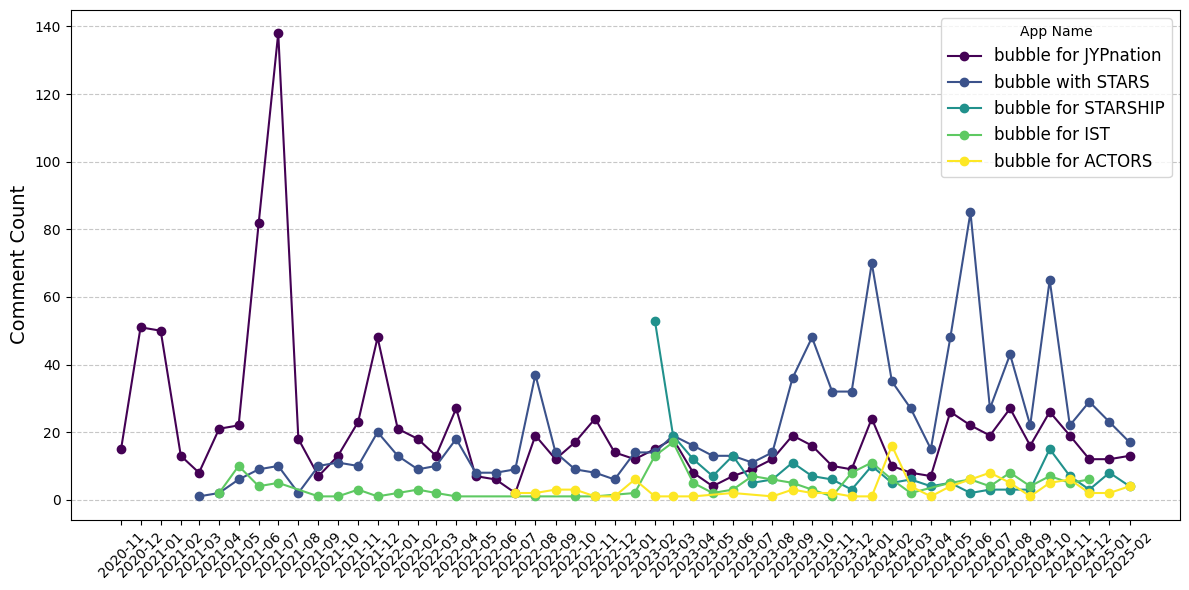

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
df = total.copy()

# 날짜 변환 및 월 단위 그룹화
df['date'] = pd.to_datetime(df['date'])
df['time_period'] = df['date'].dt.to_period('M')  # 월 단위 변환

# 앱별 전체 댓글 수 계산 후 상위 5개 앱 선택
top_apps = df['app_name'].value_counts().nlargest(5).index.tolist()

# 상위 5개 앱 데이터 필터링
filtered_df = df[df['app_name'].isin(top_apps)]

# 앱별 시간대별 댓글 수 계산
comment_counts = filtered_df.groupby(['time_period', 'app_name']).size().reset_index(name='comment_count')

# 'time_period'를 datetime으로 변환 (월의 첫날 기준)
comment_counts['time_period'] = comment_counts['time_period'].dt.to_timestamp()

# datetime 기준으로 정렬
comment_counts = comment_counts.sort_values('time_period')

# X축 레이블을 'YYYY-MM' 형식으로 변환
comment_counts['time_period_str'] = comment_counts['time_period'].dt.strftime('%Y-%m')

# 시각화
plt.figure(figsize=(12, 6))

# ✅ cool 컬러맵 적용
colors = plt.cm.viridis(np.linspace(0, 1, len(top_apps)))

# 상위 5개 앱별로 선 그래프 생성
for i, app in enumerate(top_apps):
    app_data = comment_counts[comment_counts['app_name'] == app]
    plt.plot(
        app_data['time_period'],
        app_data['comment_count'],
        marker='o',
        label=app,
        color=colors[i]  # 컬러맵 적용
    )

# X축을 datetime으로 설정하고 문자열 레이블 적용
plt.xticks(comment_counts['time_period'].unique(), comment_counts['time_period_str'].unique(), rotation=45)

# 그래프 설정
# plt.title('Top 5 Apps Comment Counts Over Time', fontsize=16)
# plt.xlabel('Time Period (Month)', fontsize=14)
plt.ylabel('Comment Count', fontsize=14)
plt.legend(title='App Name', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


2025-02-25 17:41:40,627 [INFO] matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-25 17:41:40,629 [INFO] matplotlib.category - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


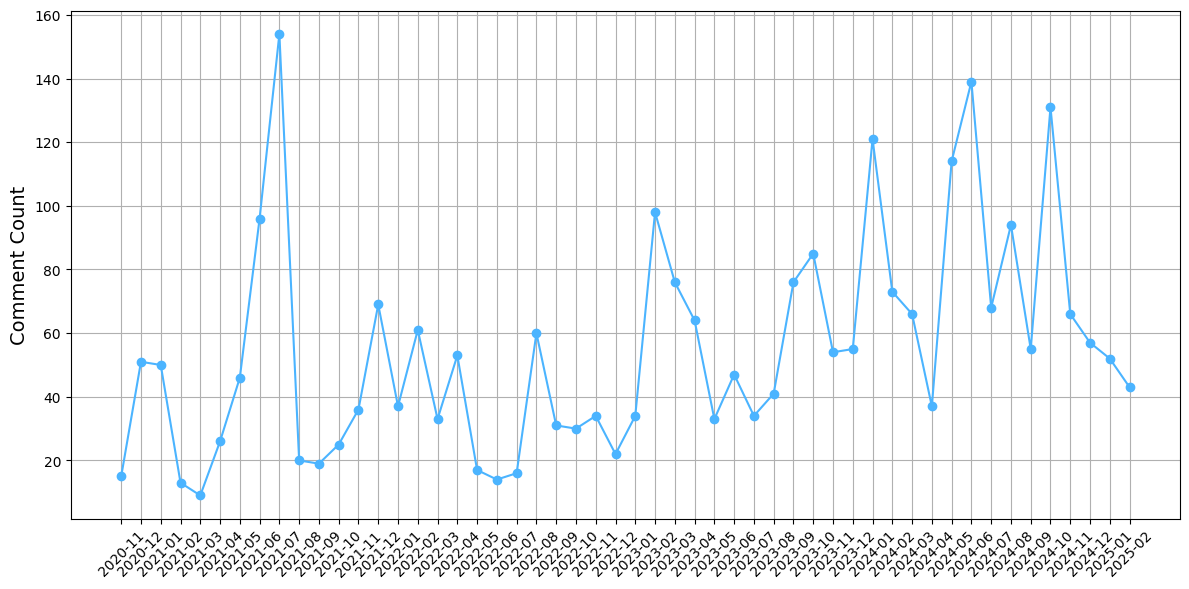

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
df = total.copy()

# 1. 데이터 준비
df['date'] = pd.to_datetime(df['date'])  # 날짜 형식 변환
df['time_period'] = df['date'].dt.to_period('M')  # 월 단위 그룹화

# 2. 시간대별 댓글 수 계산
comment_counts = df.groupby('time_period').size().reset_index(name='comment_count')

# 3. 시간대별 댓글 수 시각화
plt.figure(figsize=(12, 6))
plt.plot(comment_counts['time_period'].astype(str), comment_counts['comment_count'], marker='o', label='Comment Count')

# 그래프 설정
# plt.title("Comment Counts Over Time", fontsize=16)
# plt.xlabel("Time Period", fontsize=14)
plt.ylabel("Comment Count", fontsize=14)
plt.xticks(rotation=45)
# plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
comment_counts.sort_values(by="comment_count", ascending=False).head(5)

,time_period,comment_count
8,2021-07,154
43,2024-06,139
47,2024-10,131
38,2024-01,121
42,2024-05,114


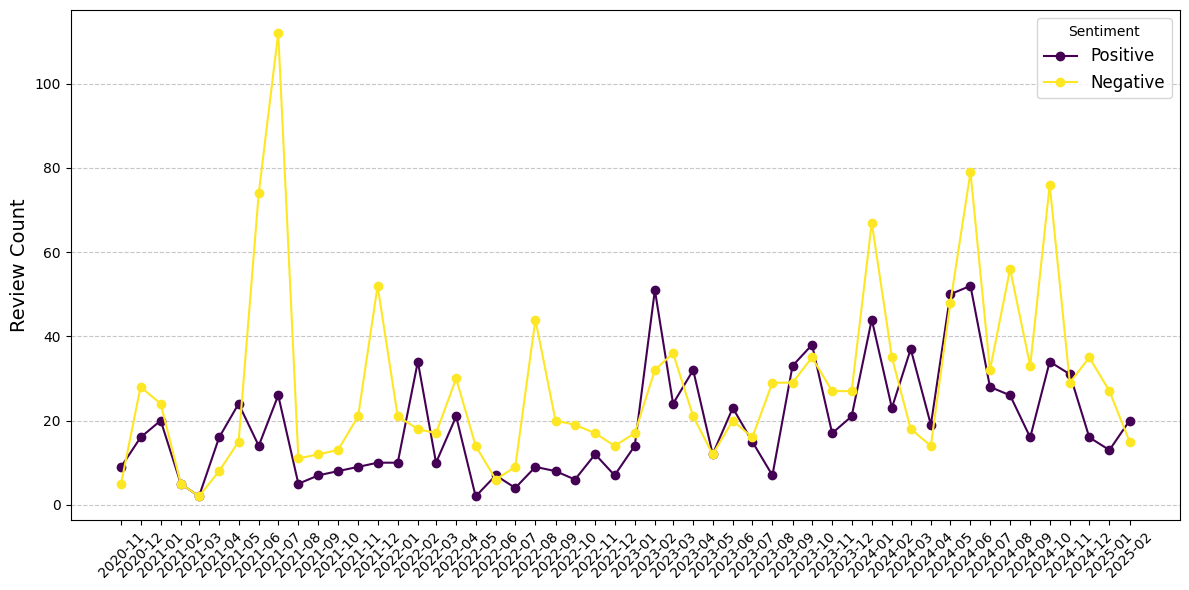

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
df = total.copy()

# 날짜 변환 및 월 단위 그룹화
df['date'] = pd.to_datetime(df['date'])
df['time_period'] = df['date'].dt.to_period('M')  # 월 단위 변환

# 긍정/부정 레이블 생성
df['sentiment'] = df['rating'].apply(lambda x: 'negative' if x in [1, 2] else 'positive' if x in [4, 5] else 'neutral')

# 긍/부정 레이블 결과 요약
sentiment_summary = df.groupby(['sentiment', 'time_period']).size().reset_index(name='review_count')

# 'time_period'를 datetime으로 변환 (월의 첫날 기준)
sentiment_summary['time_period'] = sentiment_summary['time_period'].dt.to_timestamp()

# datetime 기준으로 정렬
sentiment_summary = sentiment_summary.sort_values('time_period')

# X축 레이블을 'YYYY-MM' 형식으로 변환
sentiment_summary['time_period_str'] = sentiment_summary['time_period'].dt.strftime('%Y-%m')

# ✅ 컬러맵 적용 (viridis)
sentiments = ['positive', 'negative']
colors = plt.cm.viridis(np.linspace(0, 1, len(sentiments)))

# 시각화
plt.figure(figsize=(12, 6))

# 긍정/부정 데이터를 나누어 선 그래프 생성
for i, sentiment in enumerate(sentiments):
    sentiment_data = sentiment_summary[sentiment_summary['sentiment'] == sentiment]
    plt.plot(
        sentiment_data['time_period'],  # X축을 datetime으로 설정
        sentiment_data['review_count'],
        marker='o',
        label=sentiment.capitalize(),
        color=colors[i]  # ✅ 컬러맵에서 색상 적용
    )

# X축을 datetime으로 설정하고 문자열 레이블 적용
plt.xticks(sentiment_summary['time_period'].unique(), sentiment_summary['time_period_str'].unique(), rotation=45)

# 그래프 설정
# plt.title('Sentiment Trends Over Time', fontsize=16)
# plt.xlabel('Time Period (Month)', fontsize=14)
plt.ylabel('Review Count', fontsize=14)
plt.legend(title='Sentiment', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **3. 전처리**

### 라이브러리

In [ ]:
pip install PyKomoran

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install ko-sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install kiwipiepy

Defaulting to user installation because normal site-packages is not writeable


### a) 리뷰 불러오기

In [ ]:
import pandas as pd

# date 열 형식 변경 (연월일만 유지)
total['date'] = pd.to_datetime(total['date']).dt.date

total['date'] = pd.to_datetime(total['date'])  # 날짜 변환
total = total[total['date'] >= '2020-01-01'].sort_values(by='date', ascending=False)

total

,date,rating,review,app_name,from
0,2025-02-23,5,버블 다 좋은데 제발 글자수 좀 늘리세요 옆집은 편지도 써주고 하고싶은 말 다 하는...,bubble for STARSHIP,appstore
3,2025-02-23,1,유료어플 주제에 오류 너무 심함 내 가수 버블 와서 알림 통해 들어가서 보면 자꾸 ...,bubble with STARS,playstore
1,2025-02-23,5,bubble 앱 깔고 결재단계에서 UAH 199.99로 나오네요 변경이 안되나요 빨...,bubble with STARS,playstore
2,2025-02-23,3,근데ㅠ 답장 왜 자꾸 종이비행기 표시 나죠 못 보낸 게 한둘이아닌데,bubble for BPM,playstore
6,2025-02-20,3,친구들이 버블하길래 저도 좋아하는 배우 있어서 하려고 깔았는데 결제하려고 하니까 자...,bubble for ACTORS,appstore
...,...,...,...,...,...
2845,2020-11-25,5,제왚 충성충성 (^-^)ㄱ 슼둥이들 이랑 버블이라니 이게 나라다...,bubble for JYPnation,playstore
2846,2020-11-25,5,"투피엠때매 이런것도 다해보고,,, 아무튼 소통의 창구 감자합니다 홍홍",bubble for JYPnation,playstore
2847,2020-11-25,5,투피엠 화이팅 🥰🥰,bubble for JYPnation,playstore
2848,2020-11-25,2,이메일로 인증번호 보냈다고 하는데 왜 안오니요,bubble for JYPnation,appstore


### b) 정규표현식

In [ ]:
# 정규표현식
import re

def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    # pattern = r'\d+'  # In text, removing numbers
    # text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '[^\w\s\n]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl='', string=text)
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', string=text)
    text = re.sub('\n', '.', string=text)
    return text

# clean_str 함수를 review 컬럼에 적용
total["cleaned_review"] = total["review"].apply(clean_str)

# 중복 행 제거
total.drop_duplicates(subset=['cleaned_review'], inplace=True)

# 빈 행 제거
total.dropna(subset=['cleaned_review'], inplace=True)

# 3자 미만 리뷰 필터링
short_content = total[total['cleaned_review'].apply(len) < 3]
total = total.drop(short_content.index)

total

,date,rating,review,app_name,from,cleaned_review
0,2025-02-23,5,버블 다 좋은데 제발 글자수 좀 늘리세요 옆집은 편지도 써주고 하고싶은 말 다 하는...,bubble for STARSHIP,appstore,버블 다 좋은데 제발 글자수 좀 늘리세요 옆집은 편지도 써주고 하고싶은 말 다 하는...
3,2025-02-23,1,유료어플 주제에 오류 너무 심함 내 가수 버블 와서 알림 통해 들어가서 보면 자꾸 ...,bubble with STARS,playstore,유료어플 주제에 오류 너무 심함 내 가수 버블 와서 알림 통해 들어가서 보면 자꾸 ...
1,2025-02-23,5,bubble 앱 깔고 결재단계에서 UAH 199.99로 나오네요 변경이 안되나요 빨...,bubble with STARS,playstore,bubble 앱 깔고 결재단계에서 UAH 19999로 나오네요 변경이 안되나요 빨리...
2,2025-02-23,3,근데ㅠ 답장 왜 자꾸 종이비행기 표시 나죠 못 보낸 게 한둘이아닌데,bubble for BPM,playstore,근데 답장 왜 자꾸 종이비행기 표시 나죠 못 보낸 게 한둘이아닌데
6,2025-02-20,3,친구들이 버블하길래 저도 좋아하는 배우 있어서 하려고 깔았는데 결제하려고 하니까 자...,bubble for ACTORS,appstore,친구들이 버블하길래 저도 좋아하는 배우 있어서 하려고 깔았는데 결제하려고 하니까 자...
...,...,...,...,...,...,...
2845,2020-11-25,5,제왚 충성충성 (^-^)ㄱ 슼둥이들 이랑 버블이라니 이게 나라다...,bubble for JYPnation,playstore,제왚 충성충성 슼둥이들 이랑 버블이라니 이게 나라다
2846,2020-11-25,5,"투피엠때매 이런것도 다해보고,,, 아무튼 소통의 창구 감자합니다 홍홍",bubble for JYPnation,playstore,투피엠때매 이런것도 다해보고 아무튼 소통의 창구 감자합니다 홍홍
2847,2020-11-25,5,투피엠 화이팅 🥰🥰,bubble for JYPnation,playstore,투피엠 화이팅
2848,2020-11-25,2,이메일로 인증번호 보냈다고 하는데 왜 안오니요,bubble for JYPnation,appstore,이메일로 인증번호 보냈다고 하는데 왜 안오니요


### c) 띄어쓰기

In [ ]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

def correct_spacing_kiwi(text):
    if isinstance(text, str):
        return kiwi.space(text)
    return text

# final_review 컬럼 만들기 (공백 제거)
total["final_review"] = total["cleaned_review"].apply(lambda x: x.replace(" ", "") if isinstance(x, str) else "")

# 띄어쓰기 보정 적용
total["final_review"] = total["final_review"].apply(correct_spacing_kiwi)

total

,date,rating,review,app_name,from,cleaned_review,final_review
0,2025-02-23,5,버블 다 좋은데 제발 글자수 좀 늘리세요 옆집은 편지도 써주고 하고싶은 말 다 하는...,bubble for STARSHIP,appstore,버블 다 좋은데 제발 글자수 좀 늘리세요 옆집은 편지도 써주고 하고싶은 말 다 하는...,버블 다 좋은데 제발 글자 수 좀 늘리세요 옆집은 편지도 써 주고 하고 싶은 말 다...
3,2025-02-23,1,유료어플 주제에 오류 너무 심함 내 가수 버블 와서 알림 통해 들어가서 보면 자꾸 ...,bubble with STARS,playstore,유료어플 주제에 오류 너무 심함 내 가수 버블 와서 알림 통해 들어가서 보면 자꾸 ...,유료 어플 주제에 오류 너무 심함 내가 수 버블 와서 알림 통해 들어가서 보면 자꾸...
1,2025-02-23,5,bubble 앱 깔고 결재단계에서 UAH 199.99로 나오네요 변경이 안되나요 빨...,bubble with STARS,playstore,bubble 앱 깔고 결재단계에서 UAH 19999로 나오네요 변경이 안되나요 빨리...,bubble 앱 깔고 결재 단계에서 UAH19999로 나오네요 변경이 안되나요 빨리...
2,2025-02-23,3,근데ㅠ 답장 왜 자꾸 종이비행기 표시 나죠 못 보낸 게 한둘이아닌데,bubble for BPM,playstore,근데 답장 왜 자꾸 종이비행기 표시 나죠 못 보낸 게 한둘이아닌데,근데 답장 왜 자꾸 종이 비행기 표시 나죠 못 보낸 게 한둘이 아닌데
6,2025-02-20,3,친구들이 버블하길래 저도 좋아하는 배우 있어서 하려고 깔았는데 결제하려고 하니까 자...,bubble for ACTORS,appstore,친구들이 버블하길래 저도 좋아하는 배우 있어서 하려고 깔았는데 결제하려고 하니까 자...,친구들이 버블하길래 저도 좋아하는 배우 있어서 하려고 깔았는데 결제하려고하니까 자꾸...
...,...,...,...,...,...,...,...
2845,2020-11-25,5,제왚 충성충성 (^-^)ㄱ 슼둥이들 이랑 버블이라니 이게 나라다...,bubble for JYPnation,playstore,제왚 충성충성 슼둥이들 이랑 버블이라니 이게 나라다,제왚 충성 충성 슼 둥 이들이랑 버블이라니 이게 나라다
2846,2020-11-25,5,"투피엠때매 이런것도 다해보고,,, 아무튼 소통의 창구 감자합니다 홍홍",bubble for JYPnation,playstore,투피엠때매 이런것도 다해보고 아무튼 소통의 창구 감자합니다 홍홍,투피엠 때 매 이런 것도 다 해 보고 아무튼 소통의 창구 감자합니다 홍 홍
2847,2020-11-25,5,투피엠 화이팅 🥰🥰,bubble for JYPnation,playstore,투피엠 화이팅,투피엠 화이팅
2848,2020-11-25,2,이메일로 인증번호 보냈다고 하는데 왜 안오니요,bubble for JYPnation,appstore,이메일로 인증번호 보냈다고 하는데 왜 안오니요,이메일로 인증 번호 보냈다고 하는데 왜 안 오니요


### d) 단어만 남기기

In [ ]:
from PyKomoran import *
import pandas as pd
from sentence_transformers import SentenceTransformer,util
from sklearn.cluster import DBSCAN
import numpy as np

df = total.copy()

komoran= Komoran(DEFAULT_MODEL['LIGHT'])

## 명사 추출
n_= []
for i in range(len(df)):
  nouns = komoran.get_morphes_by_tags(df.iloc[i]['final_review'], tag_list=['NNP', 'NNG','VA'])
  n_.append(' '.join(nouns))

df['komoran_nouns'] = n_
df = df[df['komoran_nouns']!='']

## 형용사 -> 명사
def lemmatize(sentence):
    morphtags = komoran.pos(sentence)
    words = []
    for m, t in enumerate(morphtags) :
      k = t.get_pos()
      if k=='NNP' or k=='NNG' :
        words.append(t.get_morph())
      elif k=='VA' or k=='VV' :
        words.append(t.get_morph()+'다')
    return words

w_ = []
for i in range(len(df)) :
  words = lemmatize(df.iloc[i]['final_review'])
  w_.append(' '.join(words))

df['words'] = w_
df = df[df['words']!='']

df = df.reset_index(drop=True)

df

/Users/tdi/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,date,rating,review,app_name,from,cleaned_review,final_review,komoran_nouns,words
0,2025-02-23,5,버블 다 좋은데 제발 글자수 좀 늘리세요 옆집은 편지도 써주고 하고싶은 말 다 하는...,bubble for STARSHIP,appstore,버블 다 좋은데 제발 글자수 좀 늘리세요 옆집은 편지도 써주고 하고싶은 말 다 하는...,버블 다 좋은데 제발 글자 수 좀 늘리세요 옆집은 편지도 써 주고 하고 싶은 말 다...,버블 좋 글자 옆집 편지 말 팬 아티스트 돈 작 게 띄어쓰기 정도 말,버블 좋다 글자 늘리다 옆집 편지 쓰다 하다 말 하다 팬 아티스트 돈 내다 작다 보...
1,2025-02-23,1,유료어플 주제에 오류 너무 심함 내 가수 버블 와서 알림 통해 들어가서 보면 자꾸 ...,bubble with STARS,playstore,유료어플 주제에 오류 너무 심함 내 가수 버블 와서 알림 통해 들어가서 보면 자꾸 ...,유료 어플 주제에 오류 너무 심함 내가 수 버블 와서 알림 통해 들어가서 보면 자꾸...,유료 어프 주제 오류 심하 버블 답장 오류 남 돈 오류 진절머리,유료 어프 주제 오류 심하다 버블 오다 알리다 통하다 들어가다 보다 답장 보내다 오...
2,2025-02-23,5,bubble 앱 깔고 결재단계에서 UAH 199.99로 나오네요 변경이 안되나요 빨...,bubble with STARS,playstore,bubble 앱 깔고 결재단계에서 UAH 19999로 나오네요 변경이 안되나요 빨리...,bubble 앱 깔고 결재 단계에서 UAH19999로 나오네요 변경이 안되나요 빨리...,앱 결재 단계 변경 안되나요 사용 방법,앱 깔다 결재 단계 나오다 변경 안되나요 사용 방법 알리다
3,2025-02-23,3,근데ㅠ 답장 왜 자꾸 종이비행기 표시 나죠 못 보낸 게 한둘이아닌데,bubble for BPM,playstore,근데 답장 왜 자꾸 종이비행기 표시 나죠 못 보낸 게 한둘이아닌데,근데 답장 왜 자꾸 종이 비행기 표시 나죠 못 보낸 게 한둘이 아닌데,답장 종이 비행기 표시 게,답장 종이 비행기 표시 나다 보내다 게
4,2025-02-20,3,친구들이 버블하길래 저도 좋아하는 배우 있어서 하려고 깔았는데 결제하려고 하니까 자...,bubble for ACTORS,appstore,친구들이 버블하길래 저도 좋아하는 배우 있어서 하려고 깔았는데 결제하려고 하니까 자...,친구들이 버블하길래 저도 좋아하는 배우 있어서 하려고 깔았는데 결제하려고하니까 자꾸...,친구 버블 배우 결제 오류 결제 없,친구 버블 좋아하다 배우 있다 하다 깔다 결제 오류 나서다 결제 없다 하다 하다
...,...,...,...,...,...,...,...,...,...
2724,2020-11-25,5,제왚 충성충성 (^-^)ㄱ 슼둥이들 이랑 버블이라니 이게 나라다...,bubble for JYPnation,playstore,제왚 충성충성 슼둥이들 이랑 버블이라니 이게 나라다,제왚 충성 충성 슼 둥 이들이랑 버블이라니 이게 나라다,앞 충성 충성 버블 나라,오다 앞 충성 충성 버블 나라
2725,2020-11-25,5,"투피엠때매 이런것도 다해보고,,, 아무튼 소통의 창구 감자합니다 홍홍",bubble for JYPnation,playstore,투피엠때매 이런것도 다해보고 아무튼 소통의 창구 감자합니다 홍홍,투피엠 때 매 이런 것도 다 해 보고 아무튼 소통의 창구 감자합니다 홍 홍,피 엠 때 소통 창구 감자 홍 홍,피 엠 때 하다 보다 소통 창구 감자 홍 홍
2726,2020-11-25,5,투피엠 화이팅 🥰🥰,bubble for JYPnation,playstore,투피엠 화이팅,투피엠 화이팅,피 엠 화이팅,피 엠 화이팅
2727,2020-11-25,2,이메일로 인증번호 보냈다고 하는데 왜 안오니요,bubble for JYPnation,appstore,이메일로 인증번호 보냈다고 하는데 왜 안오니요,이메일로 인증 번호 보냈다고 하는데 왜 안 오니요,이메일 인증 번호,이메일 인증 번호 보내다 하다 오다


In [ ]:
import pandas as pd
import re
from konlpy.tag import Mecab

# MeCab 형태소 분석기 초기화
mecab = Mecab()

# 불용어 리스트
stopwordsdf = pd.read_excel("/Users/tdi/Desktop/VScode/250205/stopword_list.xlsx", index_col=False)
stopwords = stopwordsdf['stopword'].tolist()

# 대체어 리스트
replacewords = {
    '스밍': '스트리밍',
    '조은': '좋은',
    '업뎃': '업데이트',
    '결재': '결제',
    '렉': '버그',
    '성품': '상품'
}

# 정규표현식
def clean_str(text):
    pattern = r'([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)'  # E-mail 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = r'(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'  # URL 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = r'\d+'  # 숫자 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = r'([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = r'<[^>]*>'  # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = r'[^\w\s\n]'  # 특수 기호 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    text = re.sub(r'[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', string=text)
    text = re.sub(r'\n', '.', string=text)
    return text

# 데이터 처리 함수
def preprocess_text(df, text_column):
    processed_data = []

    for text in df[text_column]:
        # 1. 정규표현식을 사용하여 기타 문장 부호 및 기호 제거
        text = clean_str(text)

        # 2. 불용어 처리 (문장 단위 불용어 제거)
        text = ' '.join([word for word in text.split() if word not in stopwords])

        # 2. MeCab 형태소 분석기로 명사만 추출
        nouns = mecab.nouns(text)

        # 대체어 처리
        nouns = [replacewords[noun] if noun in replacewords else noun for noun in nouns]

        # # 3. 불용어 처리
        # nouns = [noun for noun in nouns if noun not in stopwords]

        # 5. 한 글자인 단어 제거
        nouns = [noun for noun in nouns if len(noun) > 1]

        # 7. 중복 제거 (순서 유지)
        nouns = list(dict.fromkeys(nouns))

        # 4. 추출된 명사 수가 3개 미만인 문장은 제외
        if len(nouns) >= 3:
            processed_data.append(' '.join(nouns))
        else:
            processed_data.append(None)

    # 데이터프레임에 새로운 컬럼 추가
    df['mecab_nouns'] = processed_data

    # # 빈 행 제거
    # df = df.dropna(subset = 'mecab_nouns')

    return df

# 데이터프레임 처리
df = preprocess_text(df, 'final_review')

# 결과 출력
df

,date,rating,review,app_name,from,cleaned_review,final_review,komoran_nouns,words,mecab_nouns
0,2025-02-23,5,버블 다 좋은데 제발 글자수 좀 늘리세요 옆집은 편지도 써주고 하고싶은 말 다 하는...,bubble for STARSHIP,appstore,버블 다 좋은데 제발 글자수 좀 늘리세요 옆집은 편지도 써주고 하고싶은 말 다 하는...,버블 다 좋은데 제발 글자 수 좀 늘리세요 옆집은 편지도 써 주고 하고 싶은 말 다...,버블 좋 글자 옆집 편지 말 팬 아티스트 돈 작 게 띄어쓰기 정도 말,버블 좋다 글자 늘리다 옆집 편지 쓰다 하다 말 하다 팬 아티스트 돈 내다 작다 보...,버블 글자 옆집 편지 아티스트 띄어쓰기 정도
1,2025-02-23,1,유료어플 주제에 오류 너무 심함 내 가수 버블 와서 알림 통해 들어가서 보면 자꾸 ...,bubble with STARS,playstore,유료어플 주제에 오류 너무 심함 내 가수 버블 와서 알림 통해 들어가서 보면 자꾸 ...,유료 어플 주제에 오류 너무 심함 내가 수 버블 와서 알림 통해 들어가서 보면 자꾸...,유료 어프 주제 오류 심하 버블 답장 오류 남 돈 오류 진절머리,유료 어프 주제 오류 심하다 버블 오다 알리다 통하다 들어가다 보다 답장 보내다 오...,유료 주제 오류 버블 진절머리
2,2025-02-23,5,bubble 앱 깔고 결재단계에서 UAH 199.99로 나오네요 변경이 안되나요 빨...,bubble with STARS,playstore,bubble 앱 깔고 결재단계에서 UAH 19999로 나오네요 변경이 안되나요 빨리...,bubble 앱 깔고 결재 단계에서 UAH19999로 나오네요 변경이 안되나요 빨리...,앱 결재 단계 변경 안되나요 사용 방법,앱 깔다 결재 단계 나오다 변경 안되나요 사용 방법 알리다,결제 단계 변경 사용 방법
3,2025-02-23,3,근데ㅠ 답장 왜 자꾸 종이비행기 표시 나죠 못 보낸 게 한둘이아닌데,bubble for BPM,playstore,근데 답장 왜 자꾸 종이비행기 표시 나죠 못 보낸 게 한둘이아닌데,근데 답장 왜 자꾸 종이 비행기 표시 나죠 못 보낸 게 한둘이 아닌데,답장 종이 비행기 표시 게,답장 종이 비행기 표시 나다 보내다 게,종이 비행기 표시
4,2025-02-20,3,친구들이 버블하길래 저도 좋아하는 배우 있어서 하려고 깔았는데 결제하려고 하니까 자...,bubble for ACTORS,appstore,친구들이 버블하길래 저도 좋아하는 배우 있어서 하려고 깔았는데 결제하려고 하니까 자...,친구들이 버블하길래 저도 좋아하는 배우 있어서 하려고 깔았는데 결제하려고하니까 자꾸...,친구 버블 배우 결제 오류 결제 없,친구 버블 좋아하다 배우 있다 하다 깔다 결제 오류 나서다 결제 없다 하다 하다,친구 버블 배우 결제 오류
...,...,...,...,...,...,...,...,...,...,...
2724,2020-11-25,5,제왚 충성충성 (^-^)ㄱ 슼둥이들 이랑 버블이라니 이게 나라다...,bubble for JYPnation,playstore,제왚 충성충성 슼둥이들 이랑 버블이라니 이게 나라다,제왚 충성 충성 슼 둥 이들이랑 버블이라니 이게 나라다,앞 충성 충성 버블 나라,오다 앞 충성 충성 버블 나라,충성 버블 나라
2725,2020-11-25,5,"투피엠때매 이런것도 다해보고,,, 아무튼 소통의 창구 감자합니다 홍홍",bubble for JYPnation,playstore,투피엠때매 이런것도 다해보고 아무튼 소통의 창구 감자합니다 홍홍,투피엠 때 매 이런 것도 다 해 보고 아무튼 소통의 창구 감자합니다 홍 홍,피 엠 때 소통 창구 감자 홍 홍,피 엠 때 하다 보다 소통 창구 감자 홍 홍,투피 소통 창구 감자
2726,2020-11-25,5,투피엠 화이팅 🥰🥰,bubble for JYPnation,playstore,투피엠 화이팅,투피엠 화이팅,피 엠 화이팅,피 엠 화이팅,None
2727,2020-11-25,2,이메일로 인증번호 보냈다고 하는데 왜 안오니요,bubble for JYPnation,appstore,이메일로 인증번호 보냈다고 하는데 왜 안오니요,이메일로 인증 번호 보냈다고 하는데 왜 안 오니요,이메일 인증 번호,이메일 인증 번호 보내다 하다 오다,이메일 인증 번호


# 4. 클러스터링

### a) 임베딩

In [ ]:
embedder = SentenceTransformer("jhgan/ko-sbert-sts")

# 'review_cleaned' 컬럼을 임베딩
df["embedding"] = df["words"].apply(lambda x: embedder.encode(x))

### b) DBSCAN 최적 하이퍼파라미더 찾기

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

# 하이퍼파라미터 후보 설정
eps_values = np.linspace(0.1, 1.0, 10)  # 0.1부터 1.0까지 10단계
min_samples_values = range(2, 6)  # 2~5

best_score = -1
best_params = None
results = []

# 벡터 데이터 추출 (NumPy 배열로 변환)
embedding_matrix = np.vstack(df["embedding"].values)

for eps, min_samples in product(eps_values, min_samples_values):
    model = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
    labels = model.fit_predict(embedding_matrix)

    # 노이즈(-1) 제외하고 실루엣 점수 계산
    if len(set(labels)) > 1 and len(set(labels)) - (-1 in labels) > 1:
        score = silhouette_score(embedding_matrix, labels, metric="cosine")
    else:
        score = -1  # 클러스터가 하나만 있을 경우 평가 불가

    results.append((eps, min_samples, score))

    if score > best_score:
        best_score = score
        best_params = (eps, min_samples)

# 결과를 DataFrame으로 저장 및 정렬
df_results = pd.DataFrame(results, columns=["eps", "min_samples", "silhouette_score"])
df_results = df_results.sort_values(by="silhouette_score", ascending=False)

# 최적의 하이퍼파라미터 출력
print(f"최적의 eps: {best_params[0]}, 최적의 min_samples: {best_params[1]}")
print(f"최고 실루엣 점수: {best_score}")

df_results.head()


최적의 eps: 0.4, 최적의 min_samples: 2
최고 실루엣 점수: 0.12692482769489288


,eps,min_samples,silhouette_score
12,0.4,2,0.126925
3,0.1,5,0.126102
11,0.3,5,0.082708
10,0.3,4,0.071371
9,0.3,3,0.016812


### c) rating 평균으로 긍/부정 분류

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer

# ✅ 1. DBSCAN 모델 적용
embedding_matrix = np.vstack(df["embedding"].values)
model = DBSCAN(eps=0.2, min_samples=3, metric="cosine")
cluster_labels = model.fit_predict(embedding_matrix)

# 클러스터 레이블을 데이터프레임에 저장
df["dbscan_cluster"] = cluster_labels

# ✅ 2. 클러스터별 리뷰를 하나의 문단으로 묶고, 평균 평점 계산
cluster_data = []  # 데이터를 저장할 리스트

for cluster_num in sorted(set(cluster_labels)):
    if cluster_num == -1:  # 노이즈 데이터 (-1) 제외
        continue
    temp_df = df[df["dbscan_cluster"] == cluster_num]

    # 클러스터별 모든 리뷰를 하나의 문단으로 결합
    merged_text = " ".join(temp_df["final_review"].astype(str))

    # 클러스터별 rating 컬럼 평균 계산
    avg_rating = temp_df["rating"].mean()

    # 클러스터별 리뷰 개수
    review_count = temp_df.shape[0]

    # 감성 분류 (평균 평점 기준)
    if avg_rating >= 4:
        sentiment = "positive"
    elif avg_rating <= 3:
        sentiment = "negative"
    else:
        sentiment = "neutral"

    # 데이터 저장
    cluster_data.append([cluster_num, avg_rating, sentiment, merged_text, review_count])

# ✅ 3. 새로운 데이터프레임 생성
df_clusters = pd.DataFrame(cluster_data, columns=["cluster", "avg_rating", "sentiment", "merged_reviews", 'count'])

# ✅ 4. TF-IDF 벡터화 적용 (final_review 컬럼 사용)
vectorizer = TfidfVectorizer(max_features=5)  # 상위 5개 주요 단어 추출

keywords_list = []  # 클러스터별 키워드 저장

for cluster_num in df_clusters["cluster"]:
    temp_df = df[df["dbscan_cluster"] == cluster_num]
    final_text = " ".join(temp_df["final_review"].astype(str))  # ✅ final_review 기반 TF-IDF

    if final_text.strip():
        tfidf_matrix = vectorizer.fit_transform([final_text])
        feature_names = vectorizer.get_feature_names_out()
        scores = tfidf_matrix.toarray()[0]

        # 상위 5개 단어 추출
        tfidf_scores = dict(zip(feature_names, scores))
        sorted_words = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)
        keywords = ", ".join([word for word, score in sorted_words])
    else:
        keywords = ""

    keywords_list.append(keywords)

# ✅ 5. TF-IDF 결과를 데이터프레임에 추가
df_clusters["keywords"] = keywords_list

df_clusters.to_excel('저장 경로', index=False)

# 5. 워드클라우드

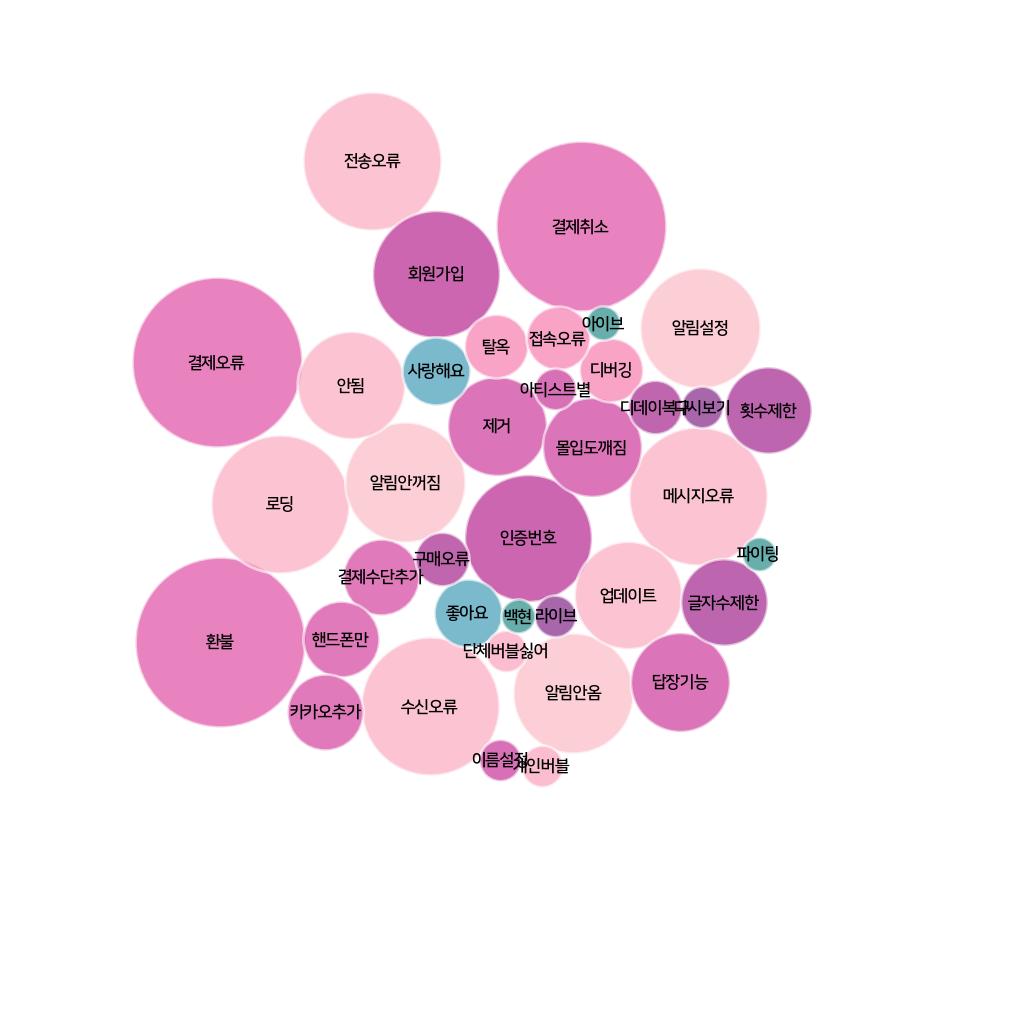

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from scipy.spatial import distance
import matplotlib.cm as cm
import matplotlib.font_manager as fm

df = pd.read_excel('저장 경로', index_col=False)

# 키워드별 count 값 및 sentiment 값 딕셔너리 생성
keyword_info_dict = {}
for index, row in df.iterrows():
    words_in_row = row["keywords"].split(", ")
    count_value = row["count"]  # 같은 행에 있는 키워드는 동일한 count 값을 가짐
    sentiment_value = row["sentiment"]  # 같은 행의 키워드는 동일한 감성 값 가짐
    for word in words_in_row:
        keyword_info_dict[word] = (count_value, sentiment_value)

# 키워드 리스트 생성 (중복 없이)
words = list(keyword_info_dict.keys())
counts = np.array([keyword_info_dict[word][0] for word in words])
sentiments = [keyword_info_dict[word][1] for word in words]

# 버블 크기 설정 (최소/최대 크기 조정)
bubble_sizes = counts * 300
radii = np.sqrt(bubble_sizes / np.pi)

# 감성(sentiment)에 따른 색상 매핑
sentiment_colormap = {
    "positive": cm.PuBuGn,  # 파란 계열
    "negative": cm.RdPu    # 빨간 계열
}

# 그래프 크기 설정
plt.figure(figsize=(13, 13))
plt.xlim(0, 100)
plt.ylim(0, 100)

# 버블 초기 위치 설정 (중앙을 기준으로 랜덤 배치)
x = np.random.normal(loc=50, scale=10, size=len(words))
y = np.random.normal(loc=50, scale=10, size=len(words))

# 충돌 방지: 버블 간 거리 조정
def adjust_positions(x, y, radii, max_iter=200):
    for _ in range(max_iter):
        moved = False
        for i in range(len(x)):
            for j in range(i + 1, len(x)):
                dist = distance.euclidean((x[i], y[i]), (x[j], y[j]))
                min_dist = (radii[i] + radii[j]) * 0.12

                if dist < min_dist:
                    overlap = min_dist - dist
                    angle = np.arctan2(y[j] - y[i], x[j] - x[i])
                    move_x = np.cos(angle) * (overlap / 3)
                    move_y = np.sin(angle) * (overlap / 3)

                    x[i] -= move_x
                    y[i] -= move_y
                    x[j] += move_x
                    y[j] += move_y
                    moved = True
        if not moved:
            break

adjust_positions(x, y, radii)

# 감성별 색상 적용 (같은 행의 키워드는 동일한 색상 적용)
color_map = {}
for index, row in df.iterrows():
    words_in_row = row["keywords"].split(", ")
    sentiment = row["sentiment"]
    colormap = sentiment_colormap.get(sentiment, cm.Greys)  # 기본값은 회색
    color_value = np.random.uniform(0.3, 0.9)  # 너무 밝거나 어둡지 않게 조정
    color = colormap(color_value)

    for word in words_in_row:
        color_map[word] = color  # 같은 행의 단어들은 같은 색상 적용

# 한글 폰트 자동 탐색
def get_korean_font():
    font_list = fm.findSystemFonts()
    for font in font_list:
        if "AppleGothic" in font or "Nanum" in font or "Malgun" in font:
            return fm.FontProperties(fname=font)
    return None

font_prop = get_korean_font()

# 버블 그리기
for i in range(len(words)):
    plt.scatter(x[i], y[i], s=bubble_sizes[i], color=color_map[words[i]], alpha=0.6, edgecolors="w", linewidth=2)
    plt.text(x[i], y[i], words[i], fontsize=12, ha="center", va="center", fontproperties=font_prop)

# 스타일링
plt.axis("off")
# plt.title("Sentiment-based Bubble Cloud", fontsize=15, fontproperties=font_prop)
plt.show()
